In [11]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np


df_resumen = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Data")
#df_detalle = pd.read_excel("pf excel.xlsx", sheet_name="Sheet2")
df_resumen.columns.values


c:\Users\ultim\anaconda3\envs\IDM\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


array(['CONTROL', '# CHEQUE', 'PARTIDA PRESUPUESTAL', 'UIDD/FOLIO FISCAL',
       'DIRECCION', 'REGIMEN FISCAL', 'NOMBRE REGIMEN FISCAL', 'RFC',
       'STATUS', 'FECHA DE RECIBIDO', 'SEMANA QUE SE PAGA', 'TIPO',
       'NOMBRE DEL PROVEEDOR', 'CORREO', 'CONCEPTO', 'TIPO2', 'SUBTOTAL',
       'IVA', 'OTROS IMPUESTOS', 'RET IVA', 'RET ISR', 'TOTAL',
       'CUENTA CLAVE', 'BANCO', 'ESTATUS', 'FECHA DE PAGO ', 'NOTAS',
       'Valida', 'MES', 'Column1', 'SUBTOTAL2', 'IVA3', 'RET IVA4',
       'RET ISR.1', 'TOTAL.1', 'CAMBIOS', 'Unnamed: 36'], dtype=object)

In [93]:
# Eliminar filas vacías o irrelevantes en df_resumen
df_numeros = df_resumen.dropna(subset=["TIPO", "Valida", "TIPO","TOTAL","FECHA DE PAGO "], how='all')


# Asegurar que los datos numéricos estén en el formato correcto
df_numeros = df_numeros[pd.to_numeric(df_numeros['FECHA DE PAGO '], errors='coerce').notna()]
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] != -45168, :]
df_numeros=df_numeros.loc[df_numeros["Valida"] != "Balance", :]
df_numeros=df_numeros.loc[df_numeros["FECHA DE PAGO "] >= 0, :]
df_numeros = df_numeros.dropna(subset=['TOTAL'])
#df_numeros["FECHA DE PAGO "]-= df_numeros["FECHA DE PAGO "].min()
#display(df_detalle)
display(df_numeros)

,CONTROL,# CHEQUE,PARTIDA PRESUPUESTAL,UIDD/FOLIO FISCAL,DIRECCION,REGIMEN FISCAL,NOMBRE REGIMEN FISCAL,RFC,STATUS,FECHA DE RECIBIDO,...,Valida,MES,Column1,SUBTOTAL2,IVA3,RET IVA4,RET ISR.1,TOTAL.1,CAMBIOS,Unnamed: 36
3,N001,0001,7007-009,0.0,86127,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,1.0,NaN,33.000000,...,7007-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45135.000000
4,N003,0004,1107-009,1.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,40.000000,...,1107-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45128.000000
5,N004,0005,1122-005,2.0,6100,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,3.0,NaN,37.000000,...,1122-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45131.000000
6,N005,0006,1101-007,3.0,4318,Régimen Simplificado de Confianza,Régimen Simplificado de Confianza,2.0,NaN,44.000000,...,1101-007,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.000000
7,N006,0007,1107-005,4.0,6140,Personas Físicas con Actividades Empresariales...,Personas Físicas con Actividades Empresariales...,4.0,NaN,44.000000,...,1107-005,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-45124.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6756,P676,2469,6004-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6004-004,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6757,P677,2470,6002-004,4607.0,11550,612,Personas Físicas con Actividades Empresariales...,1083.0,VIGENTE,464.740405,...,6002-004,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44703.259595
6758,P678,2471,6136-009,4608.0,44150,601,General de Ley Personas Morales,121.0,VIGENTE,467.694468,...,6136-009,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44700.305532
6759,N1304,2472,1202-006,4609.0,16030,626,Régimen Simplificado de Confianza,10.0,VIGENTE,463.523438,...,1202-006,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-44704.476562


In [94]:
# Resumen general
print(df_numeros.describe())
df_numeros = df_numeros.dropna(subset=['Valida'])

# Departamentos únicos
len(df_numeros["Valida"].unique())

#len(df_limpio["Valida"].unique())

       UIDD/FOLIO FISCAL          RFC  FECHA DE RECIBIDO  \
count        6175.000000  5685.000000         956.000000   
mean         2108.742348   282.596306         250.178304   
std          1301.972497   283.131183          67.143983   
min             0.000000     0.000000          33.000000   
25%           784.000000    41.000000         204.506968   
50%          2055.000000   176.000000         271.592627   
75%          3250.500000   454.000000         285.511586   
max          4610.000000  1118.000000         467.694468   

       NOMBRE DEL PROVEEDOR       CORREO     CONCEPTO      SUBTOTAL  \
count           6243.000000  5968.000000  6247.000000  6.247000e+03   
mean             487.788083    37.540382  2060.019049  2.013321e+04   
std              402.346347    60.577936  1235.518235  8.612790e+04   
min                1.000000     0.000000     3.000000 -3.281300e+04   
25%              154.000000     1.000000   998.500000  5.155200e+02   
50%              343.000000    17

1030

In [95]:
# Crear la nueva columna tomando solo la parte antes del guion
df_numeros['Cuentasb'] = df_numeros['Valida'].str.split('-').str[0]
df_numeros['Cuentasd2'] = df_numeros['Valida'].str[:2]+"00"
print(len(df_numeros["Cuentasd2"].unique()))
print(df_numeros["Valida"].isna().sum())
print(df_numeros['Cuentasd2'])

34
0
3       7000
4       1100
5       1100
6       1100
7       1100
        ... 
6756    6000
6757    6000
6758    6100
6759    1200
6760    6000
Name: Cuentasd2, Length: 6241, dtype: object


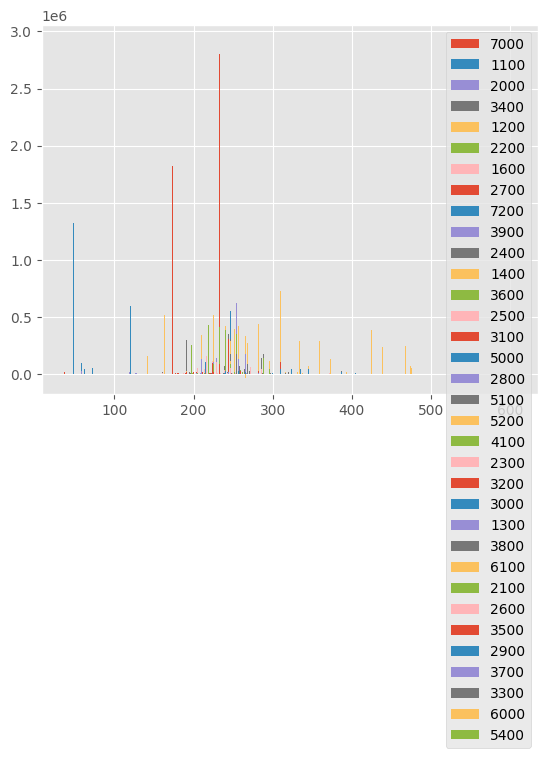

In [96]:
departamentos = list(df_numeros["Cuentasd2"].unique())
#departamentos.remove("Ba00")



for i in departamentos:
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    plt.bar(semanas,coso,label=i)
    #print(coso)
plt.legend()

plt.show()

In [97]:
sumas=[]
for i in departamentos:
    e = sum(list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL']))
    sumas.append(e)
pie=pd.DataFrame({'sumas':sumas,'departamentos':departamentos})
pie.sort_values(by="sumas")

,sumas,departamentos
33,4.060000e+04,5400
28,3.468400e+05,3500
29,3.695371e+05,2900
31,4.735120e+05,3300
24,7.213565e+05,3800
6,1.003449e+06,1600
20,1.037126e+06,2300
30,1.040078e+06,3700
13,1.161962e+06,2500
16,1.213308e+06,2800


In [98]:
fig, ax = plt.subplots()
ax.pie(pie['sumas'], labels=pie['departamentos'])

([<matplotlib.patches.Wedge at 0x1fd04431970>,
 [Text(1.0853215851242468, 0.17910068917620653, '7000'),
  Text(0.9419022883553307, 0.568172578703858, '1100'),
  Text(0.6600220127986102, 0.8799834899708467, '2000'),
  Text(0.17638647444027478, 1.0857660022465847, '3400'),
  Text(-0.40240133011858603, 1.023754447862764, '1200'),
  Text(-0.6563496556973484, 0.8827259651024051, '2200'),
  Text(-0.7133150062568749, 0.8373659306711461, '1600'),
  Text(-0.7899152035705566, 0.765528556729327, '2700'),
  Text(-0.8706618177472976, 0.672270778122158, '7200'),
  Text(-0.9814288174737748, 0.49678715385165545, '3900'),
  Text(-1.0804417802384885, 0.2065080131982435, '2400'),
  Text(-1.0557102756011079, -0.30899160828448574, '1400'),
  Text(-0.7489418108155611, -0.8056588384746415, '3600'),
  Text(-0.5539346205525073, -0.9503454299113296, '2500'),
  Text(-0.2274113766490584, -1.076236064146979, '3100'),
  Text(0.23000491423648425, -1.0756847769802582, '5000'),
  Text(0.39271126047253857, -1.027510518

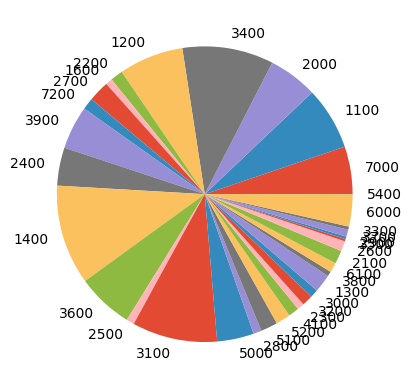

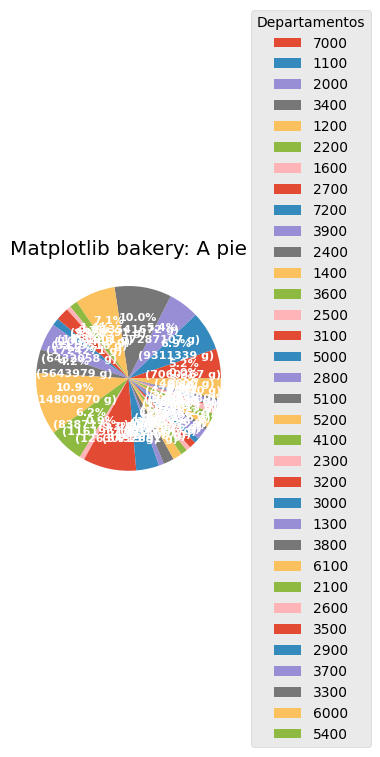

In [99]:
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))




def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} g)"


wedges, texts, autotexts = ax.pie(pie["sumas"], autopct=lambda pct: func(pct, pie["sumas"]),
                                  textprops=dict(color="w"))

ax.legend(wedges, pie["departamentos"],
          title="Departamentos",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib bakery: A pie")

plt.show()

In [10]:
# Agrupar por departamentos y subdepartamentos
agrupado = df_numeros.groupby(["Cuentasb", "Subdepartamento"])["TOTAL"].sum().reset_index()

# Obtener lista de departamentos
departamentos = agrupado["Cuentasd2"].unique()

# Crear gráficos de pastel para cada departamento
fig, axes = plt.subplots(nrows=len(departamentos), figsize=(6, len(departamentos) * 3))

for idx, departamento in enumerate(departamentos):
    subdatos = agrupado[agrupado["Cuentasd2"] == departamento]

    ax = axes[idx] if len(departamentos) > 1 else axes
    wedges, texts, autotexts = ax.pie(subdatos["TOTAL"], 
                                      labels=subdatos["Subdepartamento"], 
                                      autopct=lambda pct: f"{pct:.1f}%\n({int(np.round(pct/100.*np.sum(subdatos['TOTAL'])))} g)",
                                      textprops=dict(color="w"))

    ax.set_title(f"Departamento: {departamento}")
    plt.setp(autotexts, size=8, weight="bold")

plt.tight_layout()
plt.show()

KeyError: 'Subdepartamento'

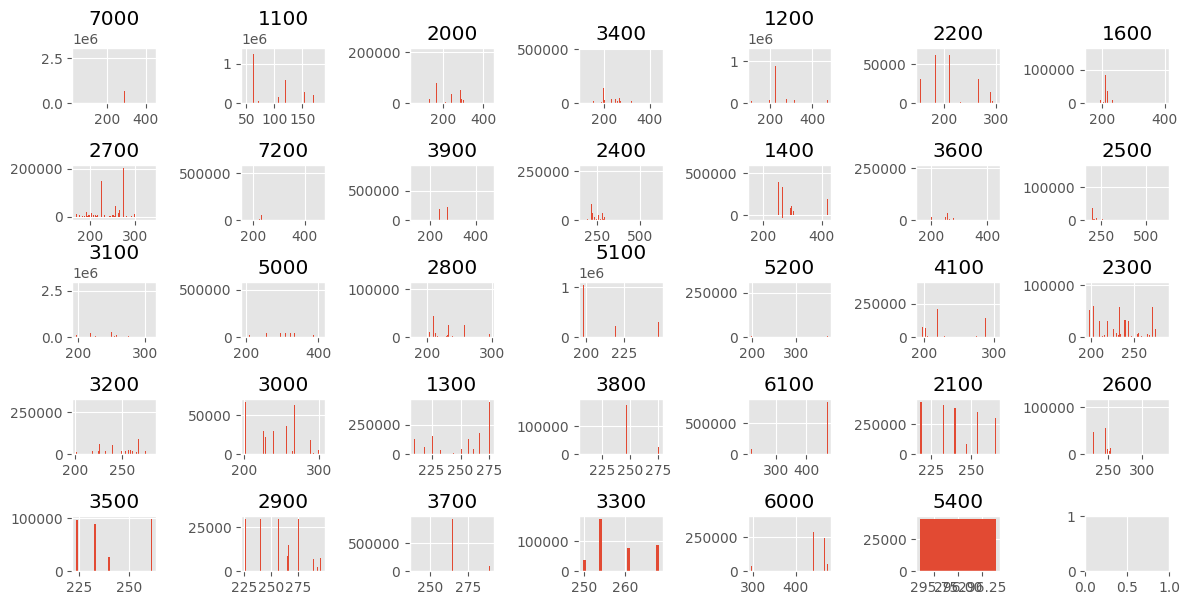

In [100]:
fig, axes = plt.subplots(5, 7, figsize=(12, 6))  # Crear figura con subgráficos


for ax, i in zip(axes.flat, departamentos):
    #otra.loc[otra["UNIDAD ESP."] == i, 'GASTO']
    coso = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, 'TOTAL'])
    semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
    ax.bar(semanas,coso,label=i)
    ax.set_title(i)  # Opcional: título con el nombre del departamento

plt.tight_layout()  # Ajusta los gráficos para evitar superposición
plt.show()

In [106]:
df_numeros.sort_values('FECHA DE PAGO ', ascending=True, inplace=True)

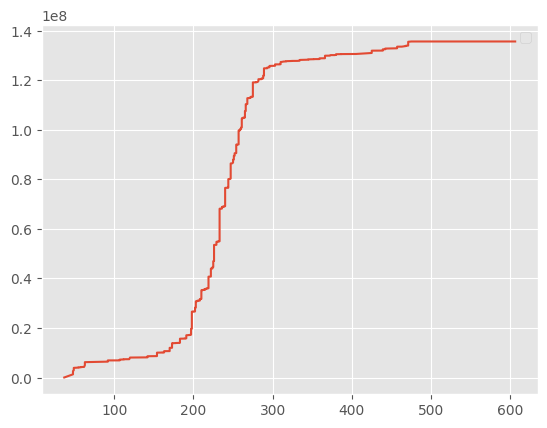

In [107]:
import numpy as np
acumulado=np.cumsum(df_numeros["TOTAL"])
semanas = list(df_numeros.loc[df_numeros["Cuentasd2"] == i, "FECHA DE PAGO "])
plt.plot(df_numeros["FECHA DE PAGO "],acumulado)
    #print(coso)
plt.legend()

plt.show()

In [112]:
df_budget = pd.read_excel("data/CR EJEMPLO MOD.xlsx", sheet_name="Budget")
df_budget.columns=["A","B","C","D","Valida","F","G","H","I","J","K"]
#df_budget.rename(columns={'Valida': 'Unnamed: 5'}, inplace=True)
df_unida = df_numeros.merge(df_budget, on='Valida')
df_unida = df_unida.dropna(subset=['C'])
#df_budget.columns.values
etapas=df_unida["A"].unique()
#etapas.remove("TIPO")
minimos=list(df_unida.groupby("A")["FECHA DE PAGO "].min())
maximos=list(df_unida.groupby("A")["FECHA DE PAGO "].max())
colormap = plt.cm.plasma  # Cambia 'viridis' por otro colormap como 'plasma', 'cividis', etc.
ocolormap = plt.cm.viridis
num_colores = len(minimos)  # Número de colores que deseas
colores = [colormap(i) for i in np.linspace(0, 1, num_colores)]
ocolores = [ocolormap(i) for i in np.linspace(0, 1, num_colores)]
print(df_unida.groupby("A")["FECHA DE PAGO "].min())
print(df_unida.groupby("A")["FECHA DE PAGO "].max())

#df_unida["C"].unique()
#etapas

A
Above the Line     48
Below the Line     58
Others             37
Post              198
Name: FECHA DE PAGO , dtype: int64
A
Above the Line    474
Below the Line    606
Others            434
Post              475
Name: FECHA DE PAGO , dtype: int64


In [109]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit as logistic
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

from scipy.optimize import curve_fit
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)
df_numeros["FECHA DE PAGO "] = pd.to_numeric(df_numeros["FECHA DE PAGO "], errors='coerce')
df_numeros = df_numeros.dropna(subset=["FECHA DE PAGO "])
x = df_numeros["FECHA DE PAGO "].values
x_scaled = (x - x.mean()) / x.std()

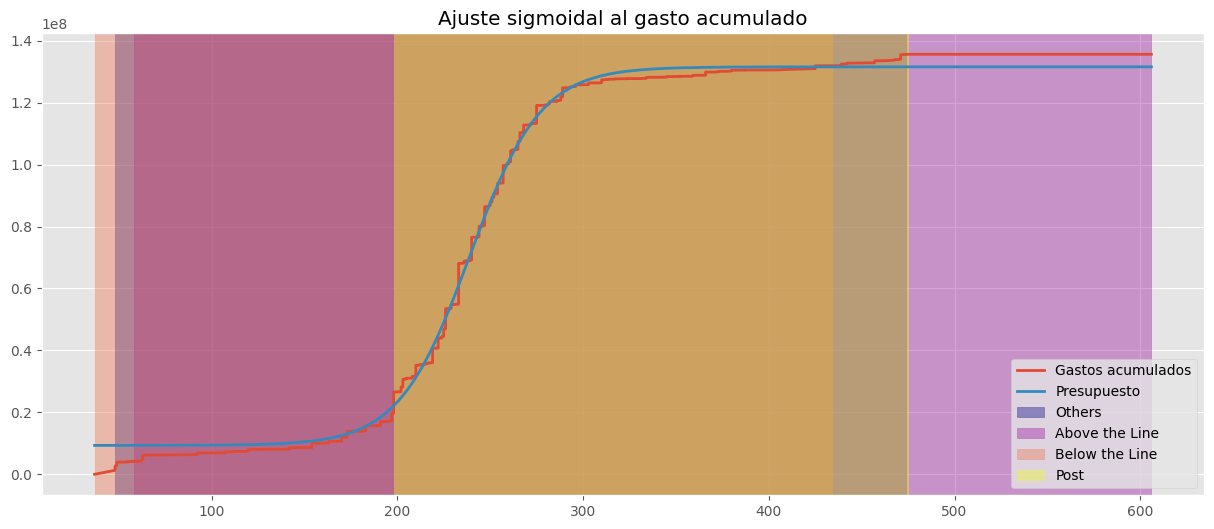

In [120]:
L_init = acumulado.max()
x0_init = 0  # porque lo escalaste
k_init = 1
b_init = acumulado.min()
p0 = [L_init, x0_init, k_init, b_init]
popt, pcov = curve_fit(sigmoid, x_scaled, acumulado, p0, method='dogbox')
y_pred = sigmoid(x_scaled, *popt)
#y_truth = logistic(df_numeros["FECHA DE PAGO "], L=L_estimate, x_0=0, k=1)


fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
for i in range(len(minimos)):
    ax.axvspan(minimos[i], maximos[i],color=colores[i],label=etapas[i],alpha=.4,edgecolor=ocolores[i])
ax.legend()
plt.show()

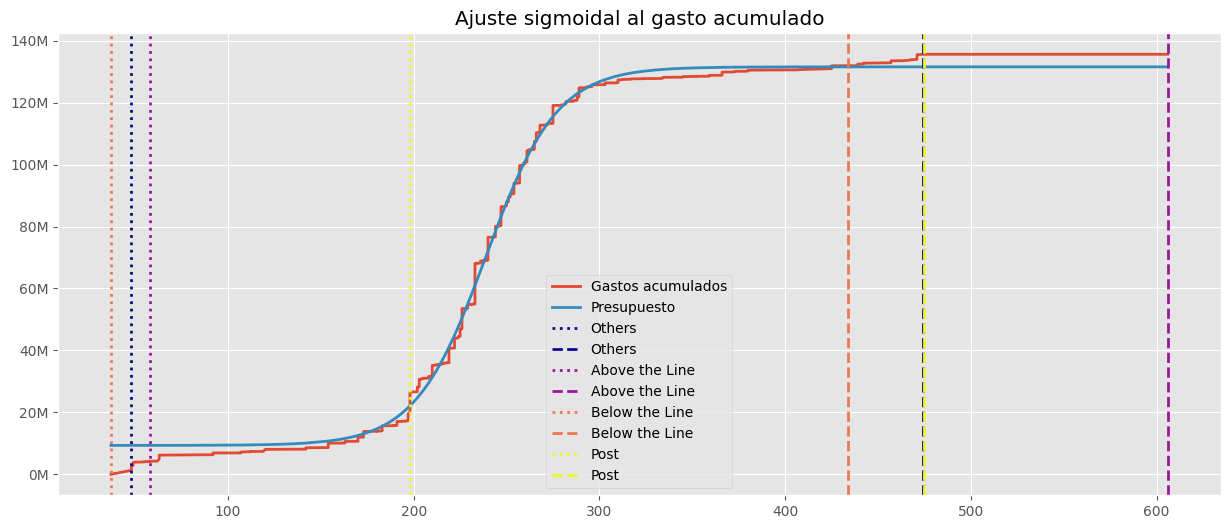

In [123]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(figsize=(15, 6))
def formato_millones(x, pos):
    return f'{int(x/1000000)}M'
ax.plot(x, acumulado, label='Gastos acumulados',linewidth=2)
ax.plot(x, y_pred, label='Presupuesto',linewidth=2)
ax.set_title('Ajuste sigmoidal al gasto acumulado')
ax.yaxis.set_major_formatter(FuncFormatter(formato_millones))
for i in range(len(minimos)):
    ax.axvline(x=minimos[i], color=colores[i], linestyle=":",label=etapas[i],linewidth=2)
    ax.axvline(x=maximos[i], color=colores[i], linestyle="--",label=etapas[i],linewidth=2)
ax.legend()

plt.show()